In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path = 'malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)


# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
dic1 = open('../../data/dict/positive-words.txt')
dic2 = open('../../data/dict/negative-words.txt')

positive_words = []
negative_words = []

for line in dic1 :
    positive_words.append(line.strip('\n'))

for line in dic2 :
    negative_words.append(line.strip('\n'))


In [4]:
positive_words[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [5]:
negative_words[:10]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination']

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../data/CEO3.csv', encoding = 'latin')
df.head(5)

,number,firm,publishing,country,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 450,Unnamed: 451,Unnamed: 452,Unnamed: 453,Unnamed: 454,Unnamed: 455,Unnamed: 456,Unnamed: 457,Unnamed: 458,Unnamed: 459
0,2,Amorepacific,1,Korea,We will use beauty to change the world and bec...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Amorepacific,3,Korea,AMOREPACIFC Group will endeavor to become a gr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,502,Amorepacific,4,Korea,AMOREPACIFIC Group has been pursuing the path ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Asiana Airlines,1,Korea,This year marks the 25th anniversary of the es...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Asiana Airlines,2,Korea,"Since the inception, Asiana Airlines has pledg...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
firm = df.get('firm')
text = df.get('text')

company = {firm[0] : text[0]}

for i in range(len(firm)) :
    if company.get(firm[i]) != None :
        company[firm[i]] = company.get(firm[i]) + '\n' + text[i]
    else :
        company[firm[i]] = text[i]
    

In [8]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
tokens = []

for f, t in company.items() :
    token = word_tokenize(t)
    tokens.append((f,token))

In [11]:
tokens

[('Amorepacific',
  ['We',
   'will',
   'use',
   'beauty',
   'to',
   'change',
   'the',
   'world',
   'and',
   'become',
   'a',
   'company',
   'that',
   'customers',
   'love',
   '.',
   'To',
   'our',
   'stakeholders',
   ',',
   'During',
   'the',
   'past',
   '67',
   'years',
   ',',
   'AMOREPACIFIC',
   'has',
   'embarked',
   'on',
   'a',
   'long',
   'journey',
   'of',
   'beauty',
   'to',
   'provide',
   'happiness',
   'and',
   'pleasure',
   'to',
   'people',
   'all',
   'around',
   'the',
   'world',
   'with',
   'AMOREPACIFIC¡¯s',
   'creation',
   'of',
   'beauty',
   'products',
   '.',
   'We',
   'have',
   'stood',
   'the',
   'test',
   'of',
   'numerous',
   'crises',
   'resulting',
   'from',
   'uncertain',
   'management',
   'conditions',
   'to',
   'achieve',
   'continuous',
   'growth',
   'by',
   'caring',
   'about',
   'our',
   'customers',
   'and',
   'taking',
   'quick',
   'actions',
   'to',
   'seek',
   'new',
   '

In [12]:
sentiment_firm = []

for token in tokens :
    firm = token[0]
    sentiment = 0
    count = 0
    
    for t in token[1] :
        if t in positive_words :
            sentiment += 1
            count += 1

        elif t in negative_words :
            sentiment -= 1
            count += 1
    
    sentiment_firm.append([firm, sentiment/count])



In [13]:
sentiment_firm

[['Amorepacific', 0.8666666666666667],
 ['Asiana Airlines', 0.768595041322314],
 ['BNK Financial Group Inc.', 0.9344262295081968],
 ['BPA', 0.8823529411764706],
 ['BS FINANCIAL GROUP INC', 0.68],
 ['CJ', 0.5555555555555556],
 ['Coway', 0.8125],
 ['Daelim', 0.75],
 ['Daewoo E&C', 0.4533333333333333],
 ['Daum Communications', 0.5652173913043478],
 ['DGB (The Daegu Bank Ltd)', 0.7662337662337663],
 ['Doosan Corporation', 0.8048780487804879],
 ['Doosan Engineering &Construction', 0.6764705882352942],
 ['Doosan Heavy Industries &Construction', 0.8351648351648352],
 ['Doosan Infracore', 0.6404494382022472],
 ['GS Caltex', 0.7878787878787878],
 ['GS Engineering &Construction (GS E&C)', 0.7142857142857143],
 ['Hana Financial', 0.7547169811320755],
 ['Hankook Tire', 0.6595744680851063],
 ['Hansol', 0.6],
 ['Hanwha Chemical', 1.0],
 ['Hyundai Engineering &Construction', 0.8222222222222222],
 ['Hyundai Glovis', 0.8666666666666667],
 ['Hyundai Heavy Industries Co. Ltd', 0.6571428571428571],
 ['Hyu

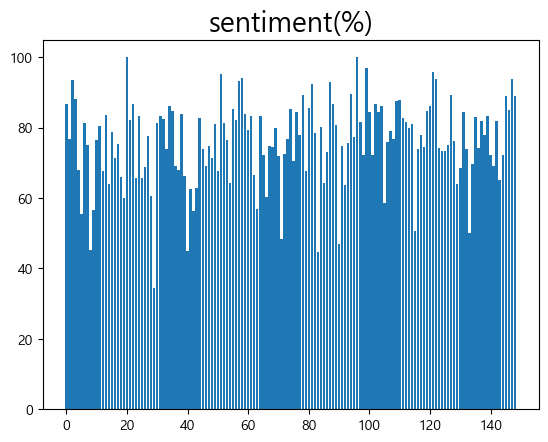

In [14]:
import numpy as np

import matplotlib.pyplot as plt

a = []

for firm in sentiment_firm :
    a.append(firm[1]*100)

x = np.arange(len(a))

plt.title('sentiment(%)', fontsize = 20)
plt.bar(x, a)
plt.show()



In [15]:
!pip install py_lex

In [16]:
from py_lex import Liwc, EmoLex

emotion_dict = pd.read_excel('../../data/dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')
emotion_dict.head()

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0


In [17]:
emotion_dict.columns

Index(['English (en)', 'Positive', 'Negative', 'Anger', 'Anticipation',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust'],
      dtype='object')

In [18]:
df = emotion_dict.set_index('English (en)')
df.head()

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
English (en),,,,,,,,,,
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,1,0,0,0,1,0,1,0,0
abandoned,0,1,1,0,0,1,0,1,0,0
abandonment,0,1,1,0,0,1,0,1,1,0


In [19]:
emotion_firm = []

for token in tokens :
    firm = token[0]
    sentiment = 0
    count = 0
    
    arr = []
    
    senti_count = 0
    
    for t in token[1] :
        if t in df.index :
            count += 1
            arr.append(list(df.loc[t]))
            
            if np.sum(list(df.loc[t])) != 0 :
                senti_count += 1
            
    emotion_firm.append([firm, np.sum(arr, axis = 0), senti_count/count])



In [20]:
emotion_firm[:10]

[['Amorepacific',
  array([218,  16,   6,  57,   4,  20,  97,   6,  14,  82]),
  0.4088050314465409],
 ['Asiana Airlines',
  array([147,  14,   9,  49,   5,  15,  41,   4,  17,  89]),
  0.41237113402061853],
 ['BNK Financial Group Inc.',
  array([96,  6,  2, 19,  2,  1, 20,  3,  2, 51]),
  0.43636363636363634],
 ['BPA', array([47,  6,  1, 12,  2,  2,  8,  2,  2, 24]), 0.34523809523809523],
 ['BS FINANCIAL GROUP INC',
  array([77,  6,  0, 19,  0,  3, 21,  3,  3, 40]),
  0.38],
 ['CJ', array([39,  9,  0,  6,  1,  4, 13,  3,  2, 25]), 0.4435483870967742],
 ['Coway',
  array([39,  1,  1, 17,  0,  1, 18,  1,  0, 23]),
  0.37606837606837606],
 ['Daelim',
  array([71, 14,  4, 12,  4, 13, 18,  8,  4, 29]),
  0.45918367346938777],
 ['Daewoo E&C',
  array([181,  46,   9,  50,  11,  14,  33,  15,  16,  96]),
  0.48727272727272725],
 ['Daum Communications',
  array([36,  7,  2, 24,  1,  3,  9,  1,  1, 15]),
  0.4645669291338583]]

In [21]:
emotion_result = []

for firm in emotion_firm :
    emotion_result.append({'Firm' : firm[0],
                           'Positive' : str('%0.2f'%(firm[1][0]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Negative' : str('%0.2f'%(firm[1][1]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Anger' : str('%0.2f'%(firm[1][2]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Anticipation' : str('%0.2f'%(firm[1][3]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Disgust' : str('%0.2f'%(firm[1][4]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Fear' : str('%0.2f'%(firm[1][5]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Joy' : str('%0.2f'%(firm[1][6]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Sadness' : str('%0.2f'%(firm[1][7]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Surprise' : str('%0.2f'%(firm[1][8]/(firm[1][0]+firm[1][1])*100))+'%',
                           'Trust' : str('%0.2f'%(firm[1][9]/(firm[1][0]+firm[1][1])*100))+'%'
                           }) 
    

In [22]:
emotion_result[:10]

[{'Firm': 'Amorepacific',
  'Positive': '93.16%',
  'Negative': '6.84%',
  'Anger': '2.56%',
  'Anticipation': '24.36%',
  'Disgust': '1.71%',
  'Fear': '8.55%',
  'Joy': '41.45%',
  'Sadness': '2.56%',
  'Surprise': '5.98%',
  'Trust': '35.04%'},
 {'Firm': 'Asiana Airlines',
  'Positive': '91.30%',
  'Negative': '8.70%',
  'Anger': '5.59%',
  'Anticipation': '30.43%',
  'Disgust': '3.11%',
  'Fear': '9.32%',
  'Joy': '25.47%',
  'Sadness': '2.48%',
  'Surprise': '10.56%',
  'Trust': '55.28%'},
 {'Firm': 'BNK Financial Group Inc.',
  'Positive': '94.12%',
  'Negative': '5.88%',
  'Anger': '1.96%',
  'Anticipation': '18.63%',
  'Disgust': '1.96%',
  'Fear': '0.98%',
  'Joy': '19.61%',
  'Sadness': '2.94%',
  'Surprise': '1.96%',
  'Trust': '50.00%'},
 {'Firm': 'BPA',
  'Positive': '88.68%',
  'Negative': '11.32%',
  'Anger': '1.89%',
  'Anticipation': '22.64%',
  'Disgust': '3.77%',
  'Fear': '3.77%',
  'Joy': '15.09%',
  'Sadness': '3.77%',
  'Surprise': '3.77%',
  'Trust': '45.28%'},


In [23]:


y = []

for firm in emotion_firm : 
    y.append(list(firm[1][2:]))



x = ['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']
z = []

for firm in emotion_firm :
    z.append(firm[0])

In [24]:
y[:10]

[[6, 57, 4, 20, 97, 6, 14, 82],
 [9, 49, 5, 15, 41, 4, 17, 89],
 [2, 19, 2, 1, 20, 3, 2, 51],
 [1, 12, 2, 2, 8, 2, 2, 24],
 [0, 19, 0, 3, 21, 3, 3, 40],
 [0, 6, 1, 4, 13, 3, 2, 25],
 [1, 17, 0, 1, 18, 1, 0, 23],
 [4, 12, 4, 13, 18, 8, 4, 29],
 [9, 50, 11, 14, 33, 15, 16, 96],
 [2, 24, 1, 3, 9, 1, 1, 15]]

In [25]:
z[:10]

['Amorepacific',
 'Asiana Airlines',
 'BNK Financial Group Inc.',
 'BPA',
 'BS FINANCIAL GROUP INC',
 'CJ',
 'Coway',
 'Daelim',
 'Daewoo E&C',
 'Daum Communications']

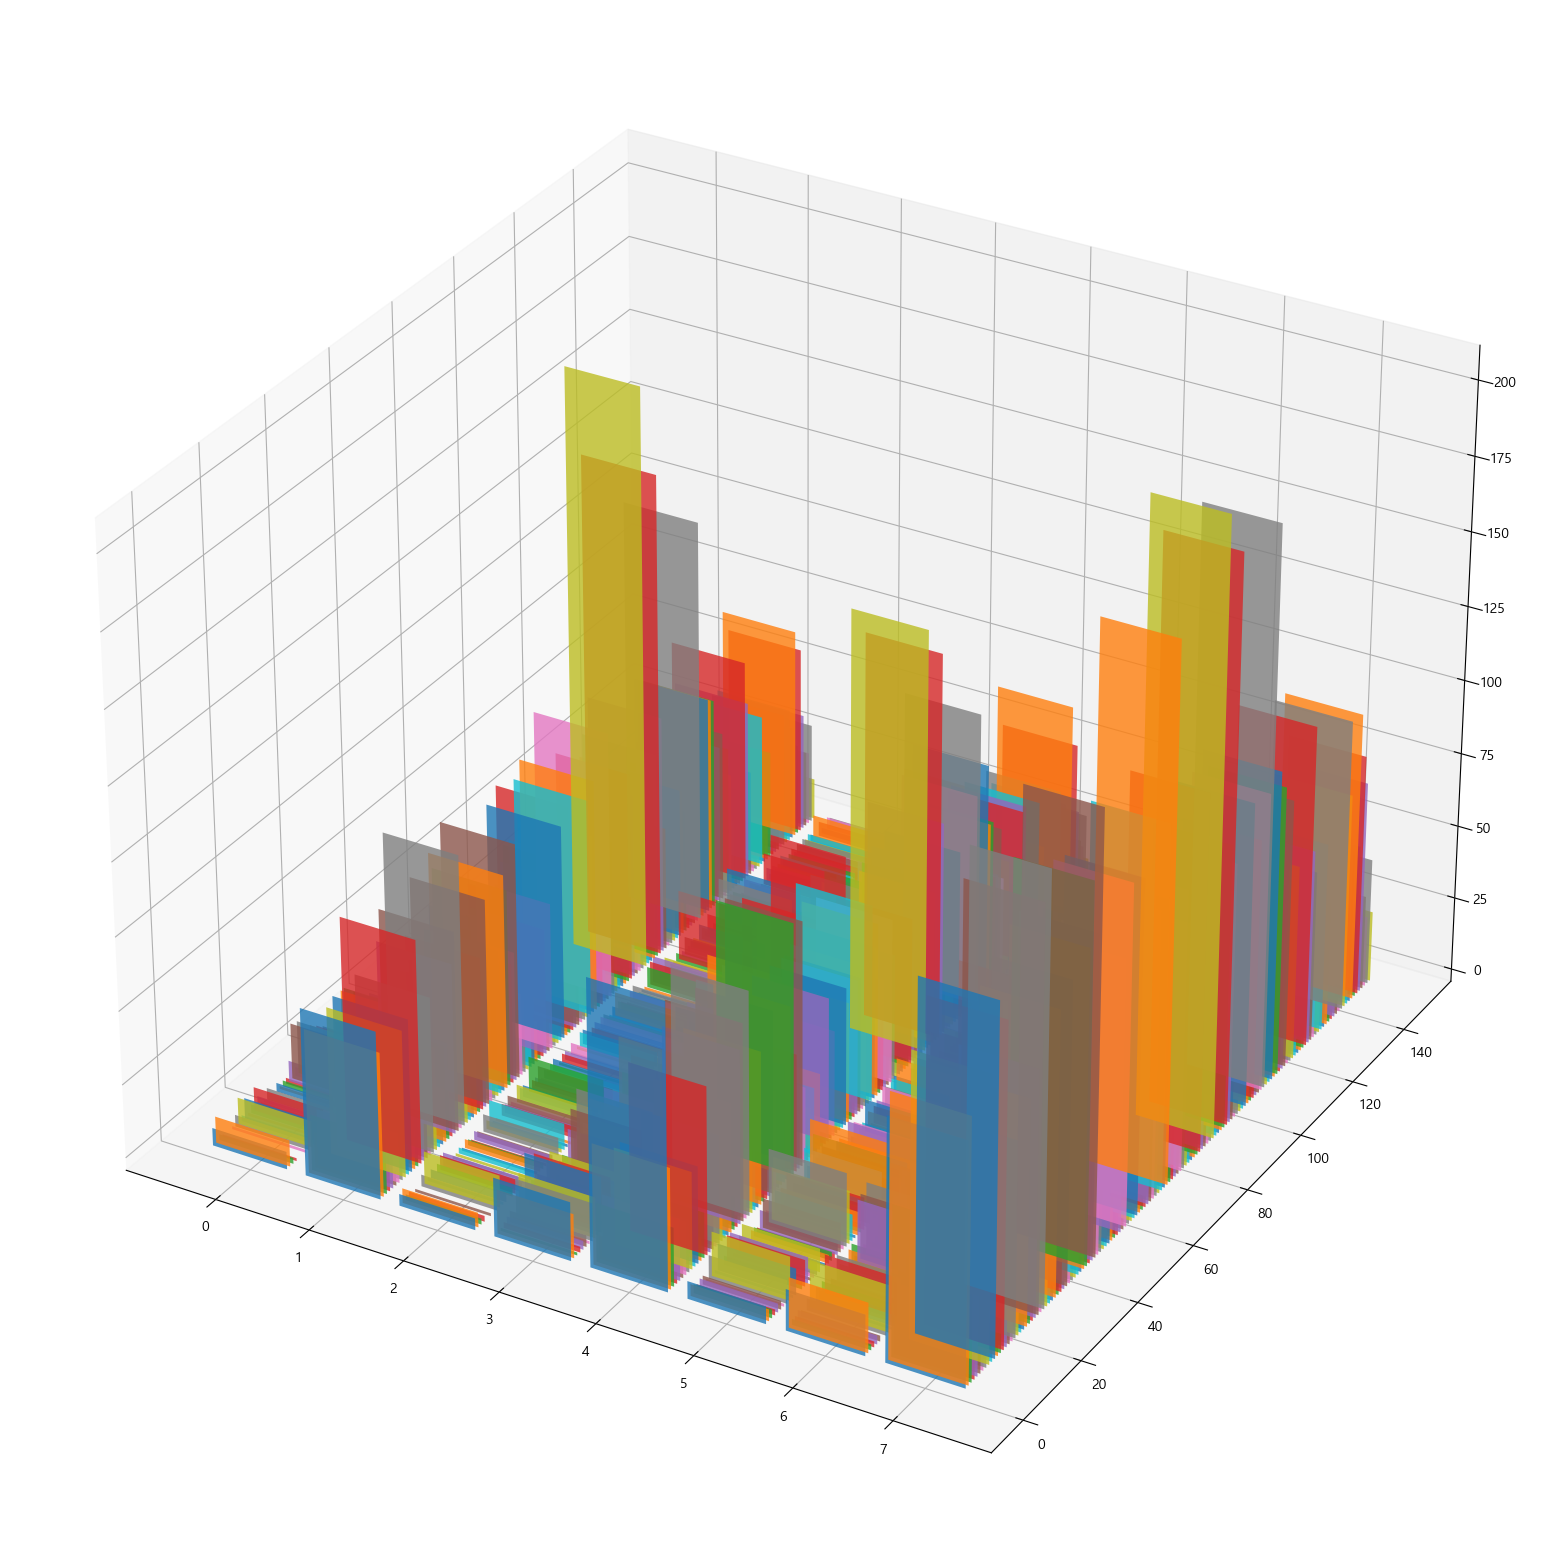

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(20, 20, 20)

ax = fig.add_subplot(111, projection = '3d')

for firm in emotion_firm :
    xs = np.arange(8)
    ys = firm[1][2:]
    zs = emotion_firm.index(firm)
    
    ax.bar(xs, ys, zs, zdir = 'y', alpha = 0.8)

plt.show()

In [27]:
E = []

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

for firm in emotion_firm :
    E.append(firm[1][2:])

# X : 기업
# a : 감정에 대한 단어의 빈도수    

a = np.transpose(E)
X = np.arange(len(a[0]))



In [28]:
a

array([[ 6,  9,  2, ...,  0,  1,  4],
       [57, 49, 19, ..., 25, 34, 14],
       [ 4,  5,  2, ...,  4,  3,  0],
       ...,
       [ 6,  4,  3, ...,  3,  3,  0],
       [14, 17,  2, ...,  2,  8,  8],
       [82, 89, 51, ..., 24, 43, 24]])

In [29]:
x

['Anger',
 'Anticipation',
 'Disgust',
 'Fear',
 'Joy',
 'Sadness',
 'Surprise',
 'Trust']

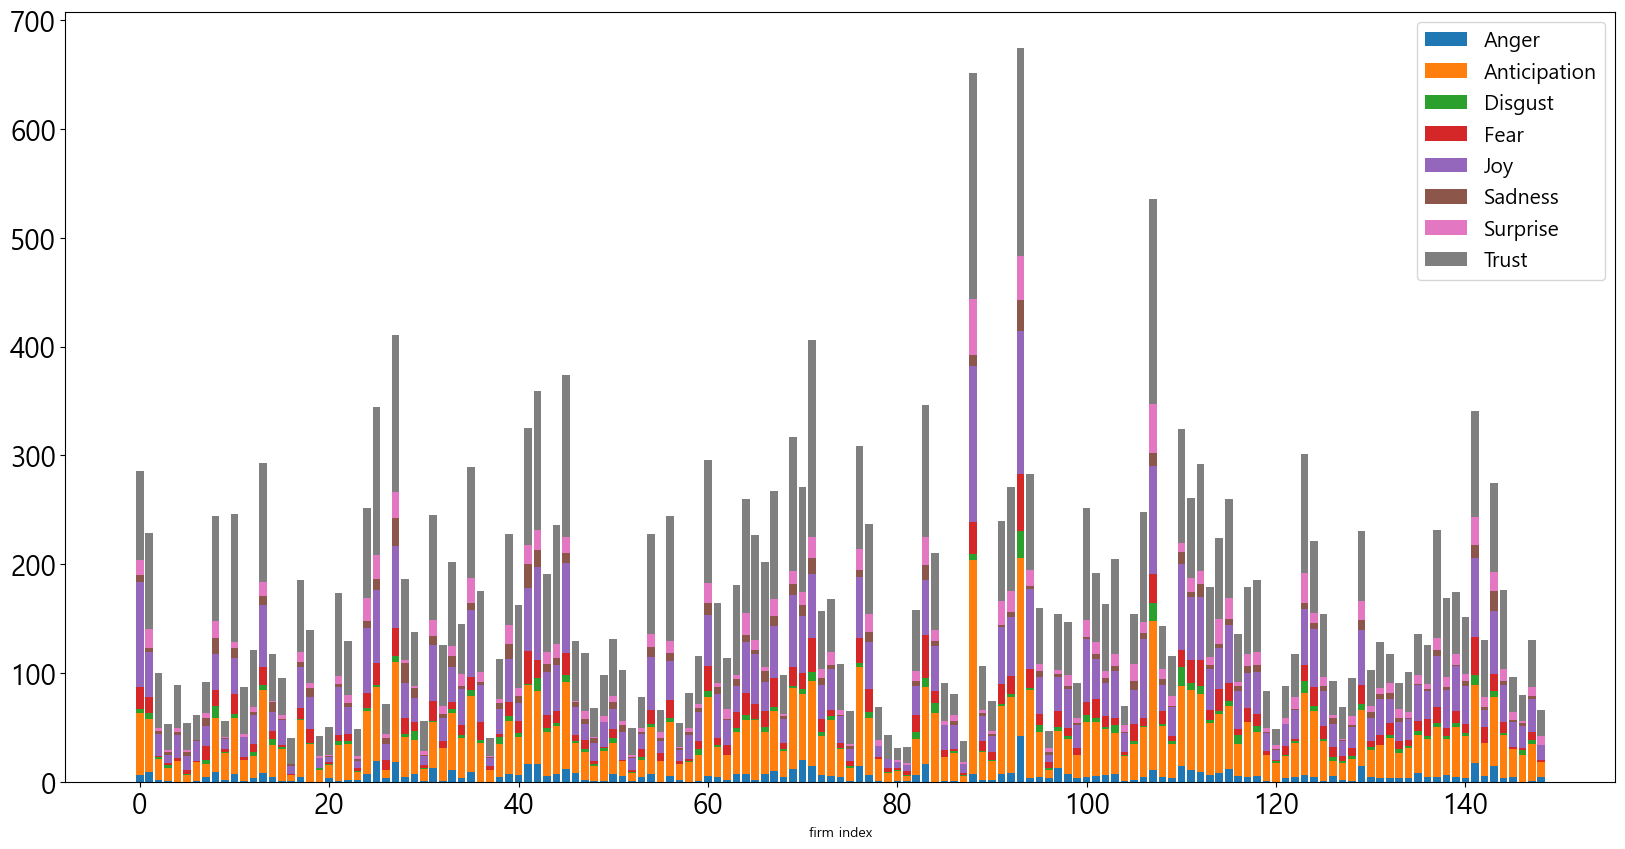

In [30]:
plt.bar(X, a[0], label = 'Anger')
plt.bar(X, a[1],bottom=a[0], label = 'Anticipation')
plt.bar(X, a[2],bottom=sum(a[0:2]), label = 'Disgust')
plt.bar(X, a[3],bottom=sum(a[0:3]), label = 'Fear')
plt.bar(X, a[4],bottom=sum(a[0:4]), label = 'Joy')
plt.bar(X, a[5],bottom=sum(a[0:5]), label = 'Sadness')
plt.bar(X, a[6],bottom=sum(a[0:6]), label = 'Surprise')
plt.bar(X, a[7],bottom=sum(a[0:7]), label = 'Trust')

plt.xlabel('firm index')
plt.legend()
plt.show()